# **Visualización**
# AE04. Matplotlib Subgraficos y Colores

En esta clase vamos a continuar el proceso de graficar utilizando matplotlib, principalmente: 

- Trabajar con subgráficos 
- Graficar con la orientación a objetos de matplotlib
- Cálculo de estadísticas con Pandas
- Manejo de anotaciones y uso de los colores con matplotlib

Comenzamos importando las librerías que vamos a utilizar:


In [1]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

%matplotlib inline 

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


Para hacer las visualizaciones, utilizaremos el set de datos de las flores de Iris.

In [3]:
#iris_path = "/content/drive/MyDrive/Colab Python/03. Análisis Exploratorio y Estadística/Archivos/VD03.csv"
iris_path = "/content/drive/MyDrive/Colab_Python/03. Análisis Exploratorio y Estadística/Archivos/VD03.csv"
iris_df = pd.read_csv(iris_path)
iris_df.sample(5)

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
94,95,5.6,2.7,4.2,1.3,Iris-versicolor
105,106,7.6,3.0,6.6,2.1,Iris-virginica
78,79,6.0,2.9,4.5,1.5,Iris-versicolor
43,44,5.0,3.5,1.6,0.6,Iris-setosa
64,65,5.6,2.9,3.6,1.3,Iris-versicolor


## <font color='blue'>Trabajando con subgráficos (subplots)</font>

Si bien podríamos generar todos los gráficos que nosotros queramos uno a uno, matplotlib nos ofrece una interfaz para generar subgráficos. En este caso, en la misma área donde podemos generar un gráfico, podemos seccionarlo en $n$ subgráficos que queramos. Para esto, utilizaremos el método `plt.subplots`, el cual nos retornara dos elementos los cuales llamaremos `fig` y `ax`. El primer elemento corresponde a un objeto [Figure](https://matplotlib.org/api/_as_gen/matplotlib.figure.Figure.html#matplotlib.figure.Figure) de matplotlib, y el segundo elemento corresponde a una lista de objetos [Axes](https://matplotlib.org/api/axes_api.html?highlight=axes#module-matplotlib.axes). Este último, nos servirá para poder realizar los gráficos en cada una de las secciones que automáticamente matplotlib separa. 

Los parámetros de entrada para el método `plt.subplots(filas, columnas, figsize=(width,height))` <font color="green">[`plt.subplots(r, c, figsize=(w,h))`]</font>, y tal como detallan: determinan el número de filas, columnas y el tamaño de la figura respectivamente. Algo importante a tener en cuenta es:

- Si uno utiliza `plt.subplots(1,1)`, el objeto `ax` corresponderá a **una** instancia del objeto `Axes`. 
- Si uno definiera `plt.subplots(n,1)` o `plt.subplots(1,n)`, el objeto `ax` correspondería a una **lista unidimensional** de objetos `Axes`. 
- Finalmente si definiéramos `plt.subplots(n,m)`, `ax` seria ahora un **arreglo bidimensional** con $n$ filas y $m$ columnas. 

Utilizando la interfaz de objetos de matplotlib, procederemos a graficar un histograma de la variable `SepalLengthCm` de iris_df y un Boxplot asociado a la misma variable.


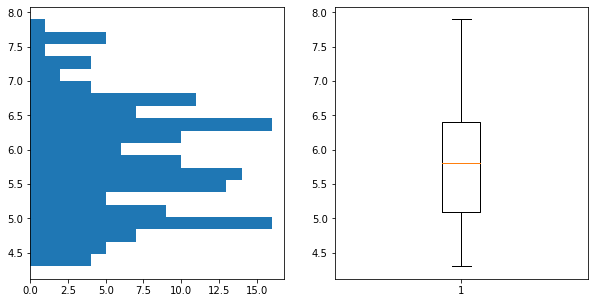

In [4]:
fig,ax = plt.subplots(1,2,figsize=(10,5)) #Definiremos 1 fila y 2 columnas
print(ax) #Imprimiremos la lista obtenida de ax
#En caso que solo es una lista de subplots
ax[0].hist(iris_df['SepalLengthCm'], orientation='horizontal', bins=20) #Accederemos al primer Axis y pintaremos un histograma en dicho Axis
#Se invierte el eje cuando es orientation = "horizontal"
ax[1].boxplot(iris_df['SepalLengthCm']) #Accederemos al segundo Axis y graficaremos un boxplot
plt.show()

Un ejemplo de cómo acceder a cada `Axis` cuando generamos subgráficos con 2 filas y 2 columnas:

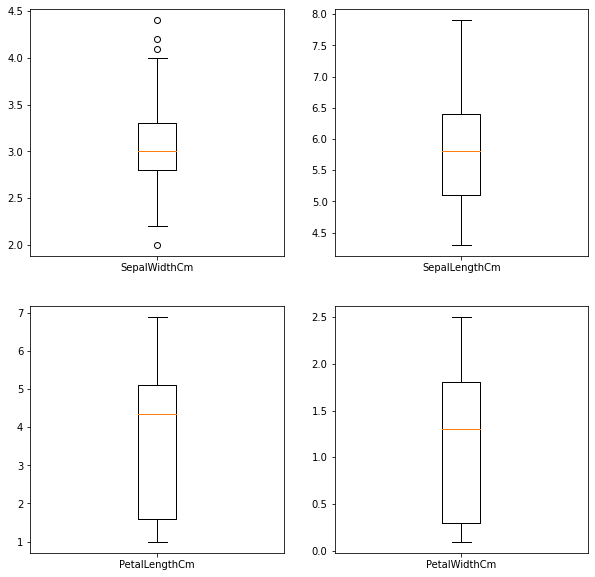

In [5]:
fig,ax = plt.subplots(2, 2, figsize=(10,10)) #generamos 4 subgraficos (2 filas y 2 columnas)

#Primera Fila, Primera Columna (la lista es bidireccional)
ax[0,0].boxplot(iris_df['SepalWidthCm']) #Generamos el boxplot para la variable SepalWidthCm
ax[0,0].set_xticklabels(["SepalWidthCm"]) #utilizamos el método set_xticklabels, para añadir el nombre de la variable en el eje X

#Primera Fila, Segunda Columna
ax[0,1].boxplot(iris_df['SepalLengthCm'])
ax[0,1].set_xticklabels(["SepalLengthCm"])

#Segunda Fila, Primera Columna
ax[1,0].boxplot(iris_df['PetalLengthCm'])
ax[1,0].set_xticklabels(["PetalLengthCm"])

#Segunda Fila, Segunda Columna
ax[1,1].boxplot(iris_df['PetalWidthCm'])
ax[1,1].set_xticklabels(["PetalWidthCm"])

plt.show()

Una forma alternativa utilizando la interfaz funcional (pyplot), para la generación de subgraficos corresponden al uso del metodo `subplot`

[Documentación plt.subplot](https://matplotlib.org/3.1.0/api/_as_gen/matplotlib.pyplot.subplot.html?highlight=pyplot%20subplot#matplotlib.pyplot.subplot)

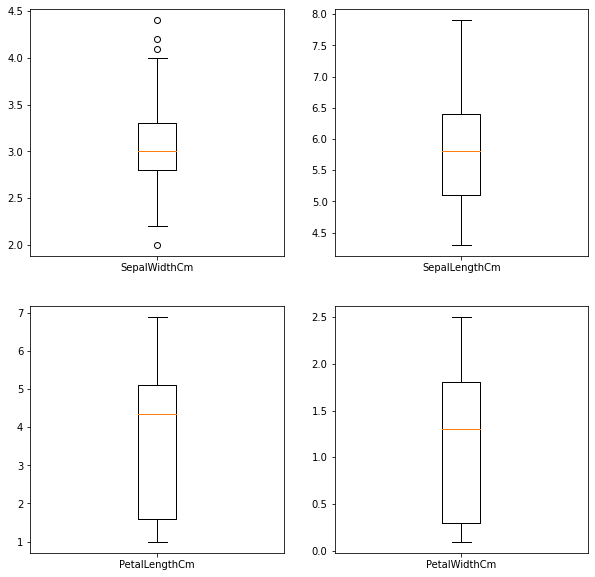

In [6]:
plt.figure(figsize=(10,10)) #10x10 in.
#Using pos
plt.subplot(221) #2 filas, 2 columnas, subfigura 1
plt.boxplot(iris_df['SepalWidthCm'])
plt.xticks(ticks=[1],labels=["SepalWidthCm"])

plt.subplot(222) #2 filas, 2 columnas, subfigura 2
plt.boxplot(iris_df['SepalLengthCm'])
plt.xticks(ticks=[1],labels=["SepalLengthCm"])

plt.subplot(223)#2 filas, 2 columnas, subfigura 3
plt.boxplot(iris_df['PetalLengthCm'])
plt.xticks(ticks=[1],labels=["PetalLengthCm"])

plt.subplot(224)#2 filas, 2 columnas, subfigura 4
plt.boxplot(iris_df['PetalWidthCm'])
plt.xticks(ticks=[1],labels=["PetalWidthCm"])

plt.show()

## <font color='blue'>Repaso: Estadísticas utilizando Pandas y Numpy</font>
Una forma rápida para poder obtener las estadísticas de centralidad y variabilidad, es utilizando el método `.describe()`. Éste generará dichas múltiples estadísticas para cada una de las columnas **numéricas** presente en un DataFrame. Las estadísticas que muestra son: 

- count: el número de elementos **no nulos** existentes en la columna
- mean: la media asociada a la columna
- std: la desviación estándar asociada a la columna
- min: valor mínimo presente en la columna
- 25%: primer cuartil $(Q_1)$
- 50%: segundo cuartil $(Q_2)$, (la mediana)
- 75%: tercer cuartil $(Q_3)$
- max: valor máximo presente en la columna


In [7]:
iris_df.describe()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
count,150.000000,150.000000,150.000000,150.000000,150.000000
mean,75.500000,5.843333,3.054000,3.758667,1.198667
std,43.445368,0.828066,0.433594,1.764420,0.763161
min,1.000000,4.300000,2.000000,1.000000,0.100000
25%,38.250000,5.100000,2.800000,1.600000,0.300000
50%,75.500000,5.800000,3.000000,4.350000,1.300000
75%,112.750000,6.400000,3.300000,5.100000,1.800000
max,150.000000,7.900000,4.400000,6.900000,2.500000


Para datos categóricos, se puede utilizar el parámetro `include=['object']` para obtener estadísticas tales como:
    
- count: Cantidad de elementos no nulos
- unique: Cantidad de valores únicos presentes en la columna
- top: Ejemplo del valor único con mayor cantidad de elementos en la columna
- freq: el total de elementos presentes en la columna, con respecto al valor obtenido en top


In [8]:
iris_df.describe(include=["object"]) #para variables cualitativas

,Species
count,150
unique,3
top,Iris-virginica
freq,50


Con un DataFrame, podemos utilizar el método `.mean()` para obtener la media de cada una de las variables. Para cada una de las estadísticas mencionadas anteriormente, existe métodos para cada una de las estadísticas. [Métodos asociados a estadisticas](https://Pandas.pydata.org/Pandas-docs/stable/user_guide/computation.html#method-summary)<font color="green"> No funciona el link</font>

In [9]:
iris_df.mean()  # Media para cada columna 
                # Future Warning numeric_only=True

Id               75.500000
SepalLengthCm     5.843333
SepalWidthCm      3.054000
PetalLengthCm     3.758667
PetalWidthCm      1.198667
dtype: float64

También podemos especificar las columnas las cuales se calcularán las estadísticas

In [10]:
columns = ['SepalLengthCm', 'SepalWidthCm'] #Solo las columnas a encontrar la media
iris_df[columns].mean() # Media para cada columna
                        # usar el argumento: numeric_only=True

SepalLengthCm    5.843333
SepalWidthCm     3.054000
dtype: float64

Solo por *sanity check*, comprobamos que el método de Numpy da el mismo resultado que el implementado en Pandas

In [11]:
iris_df['SepalLengthCm'].mean(),np.mean(iris_df['SepalLengthCm']) # Media para la columna 'SepalLengthCm'

(5.843333333333335, 5.843333333333335)

<font color="green">Es lo mismo, aunque se usa distintas librerias, la primera es de pandas y la segunda de numpy</font>

Ejemplo de cómo obtener $Q_1$, $Q_2$ y $Q_3$ uno a uno:

In [12]:
print(iris_df['SepalLengthCm'].quantile(0.25),
      iris_df['SepalLengthCm'].quantile(0.5), 
      iris_df['SepalLengthCm'].quantile(0.75))

5.1 5.8 6.4


O en su defecto, al método `.quantile`, dar como parámetro de entrada una lista con los cuantiles que queremos:

In [13]:
iris_df['SepalLengthCm'].quantile([0.25, 0.5, 0.75]) #es posible calcular el rango intercuartil, calcular los bigotes del
#cajón y encontrar los valores outliers

0.25    5.1
0.50    5.8
0.75    6.4
Name: SepalLengthCm, dtype: float64

## <font color='blue'>Manejo de anotaciones</font>

Anteriormente, habíamos visto el uso del método `plt.text` para poder colocar texto en nuestras visualizaciones. Existe otro método, que da una mayor flexibilidad al momento de hacer nuestras anotaciones, incorporando el uso de flechas y otros efectos los cuales se detallan en el siguiente enlace:

[Tutorial de anotaciones](https://matplotlib.org/3.1.1/tutorials/text/annotations.html)

Para hacer el uso del método de anotación se definen como mínimo dos parámetros: `s` (el string a mostrar) y `xy`, par de coordenadas del gráfico con los valores $x$ e $y$. A modo de ejemplo, vamos a ver el uso de `plt.annotate`:

<font color="green"> Para anotar textos y flechas</font>

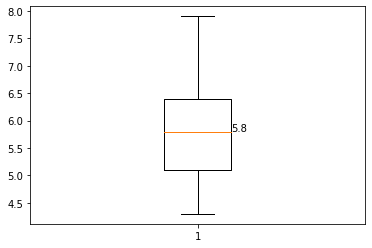

In [14]:
width = 0.2 #Vamos a definir un valor de ancho para el boxplot que vamos a graficar
# quantile nos devuelve una serie; extraemos el valor de ella
median = iris_df['SepalLengthCm'].quantile([0.5]).values[0]

#Sabiendo que por defecto, matplotlib deja en el valor de x=1 el primer boxplot, vamos a generar la anotación en el eje x (1 + width/2), y en el eje y, el valor de la mediana
xy = (1 + width/2, median ) #Guardamos este par en una tupla con el nombre de xy

plt.boxplot(iris_df['SepalLengthCm'],widths=width) # Graficamos nuestro boxplot (con ancho=width)
# ATENCIÓN: El parámetro 's' de annotate() ha sido renombrado a  'text' desde Matplotlib 3.3
plt.annotate(s = f'{median}', xy = xy) #generamos la anotación, con s="5.8" (el valor de la mediana), y las coordenadas xy
#s es el texto a mostrar y xy son las coordenadas
plt.show()

Cabe destacar que la anotación tiene un punto de partida el cual nosotros detallamos con el par `xy`, pero a su vez nosotros podemos modificar las coordenadas de donde mostramos el texto. Esto va a ser útil con una opción que vamos a ver más adelante. En este caso, podemos modificar las coordenadas xy del texto utilizando el parámetro `xytext`:

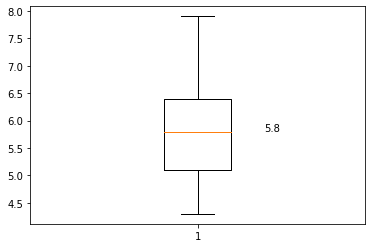

In [15]:
width = 0.2
xy = (1 + width/2 , median) #coordenadas de la anotación

xytext = (1 + width ,5.8) #Movemos las coordenadas XY del texto correspondiente al ancho del boxplot.

plt.boxplot(iris_df['SepalLengthCm'], widths=width)

plt.annotate(s = f'{median}', xy = xy, 
             xytext = xytext) # Añadimos las nuevas coordenadas para el texto
plt.show()

A su vez, podemos definir las coordenadas xy para el texto utilizando coordenadas, o en su defecto, posiciones proporcionales al tamaño del gráfico. En este caso, vamos a utilizar subplots para mostrar las dos formas, coordenadas y proporciones. Para poder detallar una de las dos modalidades tenemos que hacer uso del parámetro `xycoords`, el cual inicializamos en alguno de los dos valores: `"data"` (por defecto) o `"axes fraction"`.

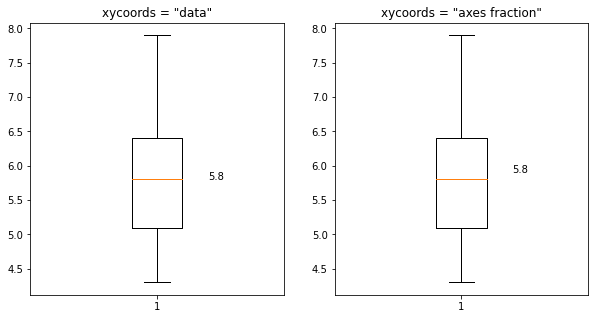

In [16]:
width = 0.2

#para xycoords="data", no tenemos que cambiar nada de como lo hemos estado haciendo
xy = (1 + width/2 , median)
xytext = (1 + width , median) #Movemos las coordenadas XY del texto

plt.figure(figsize=(10,5)) #definimos una nueva figura de width=10, height=5
plt.subplot(121) # Trabajamos con el primer subplot
xycoords="data" #definimos xycoords= "data" y realizamos la misma operacion como anteriormente lo habiamos hecho
plt.boxplot(iris_df['SepalLengthCm'],widths=width)
plt.annotate(s = f'{median}', xy = xy, 
             xytext = xytext, xycoords = xycoords)
plt.title('xycoords = "data"')

plt.subplot(122) # El subplot 2, las coordenadas xy se van a generar con "axes fraction"
xytext = (0.7, 0.45) #Ideal entre x,y \in [0,1], en este caso cambiamos los valores en proporciones con respecto a la figura (0.7 del eje X y 0.45 del eje Y)
xycoords="axes fraction" #Reemplazamos el valor de xycoords
plt.boxplot(iris_df['SepalLengthCm'],widths=width)
plt.annotate(s = f'{median}', xy = xy, 
             xytext = xytext, xycoords = xycoords)
plt.title('xycoords = "axes fraction"')
#xycoords="data", usa la misma referencia de eje, xycoords="axes fraction" es un valor entre 0 y 1 
#(proporción acumulada del total izquierda-abajo) 
plt.show()

Finalmente, vamos a retomar el por qué podemos definir un inicio de la anotación con las coordenadas xy, para luego separar el texto con xytext. La idea, es que ahora nosotros podemos agregar flechas las cuales nos permiten resaltar de mejor manera lo que nosotros queremos anotar. Para esto, necesitamos definir un diccionario el cual le vamos a llamar `arrowprops`, y contiene las siguientes keys/values: 

- arrowstyle: '->' Queremos un estilo de flecha tradicional
- connectionstyle: 'arc3' Queremos que, desde el texto hacia el inicio de la anotación, se genere con una línea recta

Más posibles valores para estos dos keys, la pueden ver en el [Tutorial](https://matplotlib.org/3.1.1/tutorials/text/annotations.html#annotating-with-arrow) de las anotaciones. Finalmente, nosotros añadimos al método `annotate`, el nuevo diccionario utilizando el parámetro `arrowprops`. El ejemplo se ve a continuación:


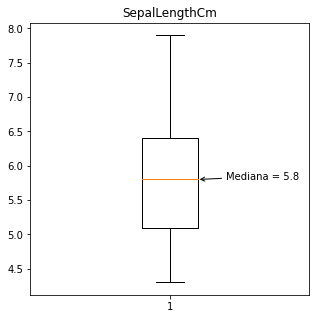

In [17]:
width = 0.2
xy = (1 + width/2 , median)
xytext = (1 + width , median) #Movemos las coordenadas XY del texto
xycoords = "data"

arrowprops = dict(arrowstyle="->", connectionstyle="arc3") #Añadimos el diccionario utilizando la funcion de construccion dict

fig, ax = plt.subplots(1, 1, figsize=(5, 5)) #definimos un subplot de fila 1, columna 1 y detallamos su largo ancho

ax.boxplot(iris_df['SepalLengthCm'], widths=width) #Pintamos nuestro boxplot

ax.annotate(s = f"Mediana = {median}", xy = xy, #Fijenese aca que en el texto se inserto un salto de linea (\n) el cual se va a ver reflejado en el gráfico
             xytext = xytext, xycoords = xycoords, arrowprops = arrowprops)

ax.set_title("SepalLengthCm")
plt.show()

## <font color='green'>Actividad 1:</font>


Generar dos gráficos de cajas y bigotes (idealmente con subplots). El primero debe ser la variable "SepalWidthCm" y el segundo una variable de su elección. Además de esto, debe realizar anotaciones para cada uno de los siguientes elementos: 

- Mediana
- Media
- Primer Cuartil
- Tercer Cuartil
- Outliers

**Notas:** 
1. Pueden alternar las posiciones X de las anotaciones para que los gráficos no se vean cargados hacia un lado. 
2. Como desafío, pueden generar una función la cual reciba como parámetros los diversos elementos que forman una anotación. Esto lo pueden realizar para mejorar la legibilidad de su código.


In [18]:
#Función para gráficar boxplot para identificar sus distintos componentes 
def graficos(dataframe):

    #Calcula las estadisticas básicas
    median = round(dataframe.quantile(0.5),2)
    mean = round(dataframe.mean(),2)
    q1 = round(dataframe.quantile(0.25),2)
    q3 = round(dataframe.quantile(0.75),2)
    liminf = round(q1 - 1.5 * (q3 - q1),2)
    limsup = round(q3 + 1.5 * (q3 - q1),2)

    #Obtiene los valores mínimo y máximo del bigote
    capinf = plt.boxplot(dataframe)['caps'][0].get_ydata()[0]
    capsup = plt.boxplot(dataframe)['caps'][1].get_ydata()[0]

    #Si el valor mínimo del bigote es mayor a lo calculado con el IQR actualiza su valor
    if capinf >= liminf:
        liminf = capinf
    #Si el valor máximo del bigote es menor a lo calculado con el IQR actualiza su valor
    if capsup <= limsup:
        limsup = capsup

    #Define las posiciones de los valores
    q1xy = (1.1, q1)
    q2xy = (0.92, median)
    q3xy = (1.1, q3)
    lixy = (0.95, liminf)
    lsxy = (0.95, limsup)
    meanxy = (1.1, mean)

    #Define las posiciones del texto
    q1xytext = (1.2, q1)
    q2xytext = (0.55, median)
    q3xytext = (1.2, q3)
    lixytext = (0.55, liminf + 0.1)
    lsxytext = (0.55, limsup - 0.1)
    meanxytext = (1.2, mean)

    #Crea un gráfico box and whiskers
    plt.boxplot(dataframe, showmeans=True, meanline='-')
    plt.xlabel(dataframe.name) #nombre variable en eje

    #Agrega las anotaciones de las estadísticas del gráfico
    plt.annotate(s = f"Mediana = {median}", xy = q2xy,  xytext = q2xytext, xycoords = 'data', 
                 arrowprops=dict(arrowstyle="->", connectionstyle="arc3", ))
    plt.annotate(s = f"Media = {mean}", xy = meanxy,  xytext = meanxytext, xycoords = 'data', 
                 arrowprops=dict(arrowstyle="->", connectionstyle="arc3", ))
    plt.annotate(s = f"Q1 = {q1}", xy = q1xy,  xytext = q1xytext, xycoords = 'data', 
                 arrowprops=dict(arrowstyle="->", connectionstyle="arc3", ))
    plt.annotate(s = f"Q3 = {q3}", xy = q3xy,  xytext = q3xytext, xycoords = 'data', 
                 arrowprops=dict(arrowstyle="->", connectionstyle="arc3", ))
    plt.annotate(s = f"LimInf = {liminf}", xy = lixy,  xytext = lixytext, xycoords = 'data', 
                 arrowprops=dict(arrowstyle="->", connectionstyle="arc3", ))
    plt.annotate(s = f"LimSup = {limsup}", xy = lsxy,  xytext = lsxytext, xycoords = 'data', 
                 arrowprops=dict(arrowstyle="->", connectionstyle="arc3", ))

    #Obtiene una lista de los valores outliers
    outliers_list = plt.boxplot(dataframe)['fliers'][0].get_ydata()
    outliers_list.sort()

    #Si existen valores outliers también los agrega como una anotación
    if len(outliers_list) > 0:
        #En el caso de varios valores va graficando uno a cada lado de la caja para no saturar el gráfico
        for i in range(0,len(outliers_list)):
            if i % 2 == 0:
                outxy = (1.02, outliers_list[i])
                outxytext = (1.2, outliers_list[i])
                plt.annotate(s = f"Outlier = {outliers_list[i]}", xy = outxy,  xytext = outxytext, xycoords = 'data', 
                             arrowprops=dict(arrowstyle="->", connectionstyle="arc3", color= 'red'))
            else:
                outxy = (0.98, outliers_list[i])
                outxytext = (0.55, outliers_list[i])
                plt.annotate(s = f"Outlier = {outliers_list[i]}", xy = outxy,  xytext = outxytext, xycoords = 'data', 
                             arrowprops=dict(arrowstyle="->", connectionstyle="arc3", color= 'red'))



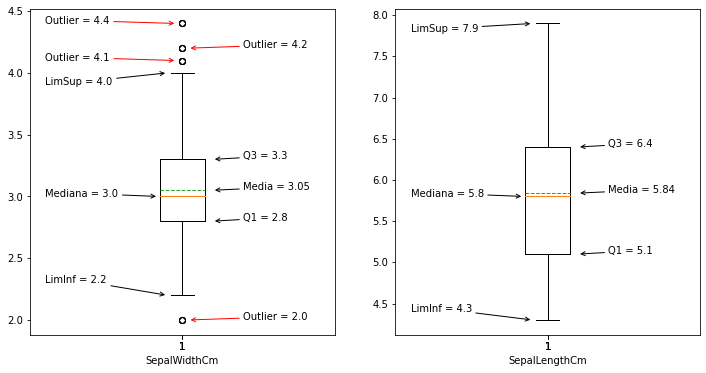

In [19]:
#Se grafica SepalWidth and SepalLength
fig, ax = plt.subplots(nrows=1, ncols=2, figsize=(12, 6))

plt.subplot(121)
graficos(iris_df['SepalWidthCm'])

plt.subplot(122)
graficos(iris_df['SepalLengthCm'])

<font color='green'>Otra forma</font>

In [20]:
#función que gráfica un boxplot y sus componentes
def annotate_stadistics(df, col, dy=[0,0,0,0,0,0]):
    # Parametros internos
    arrowprops = dict(arrowstyle="->", connectionstyle="arc3") #Añadimos el diccionario utilizando la funcion de construccion dict
    width=0.2 #longitud del cajon
    xycoords='data' #coordenadas del gráfico (depende de los datos)
    # Calculos de estadisticas y subconjuntos
    s = df[col]                                 # Serie a visualizar
    median = s.quantile([0.5]).values[0]
    Q1 = s.quantile([0.25]).values[0]
    Q3 = s.quantile([0.75]).values[0]
    mean = s.mean()
    bigote_inf = Q1 - 1.5*(Q3 - Q1)
    bigote_sup = Q3 + 1.5*(Q3 - Q1)
    s2 = s[s>=bigote_inf][s<=bigote_sup]        # datos sin outliers
    s_outsup = s[s>bigote_sup]                  # outliers superior
    s_outinf = s[s<bigote_inf]                  # outliers inferior
    # Boxplot con anotaciones
    plt.boxplot(df[col], widths=width, showmeans=True, meanline='-') #Pintamos nuestro boxplot
    plt.title(col)
    plt.annotate(s = f"Mediana = {median}", xy = (1 + width/2 , median), xytext = (1 + width*0.8 , median + dy[0]), 
                 xycoords = xycoords, arrowprops = arrowprops)
    plt.annotate(s = f"Mean = {round(mean,2)}", xy = (1 - width/2 , mean), xytext = (1 - width*2.3 , mean + dy[1]), 
                 xycoords = xycoords, arrowprops = dict(arrowstyle="->", connectionstyle="arc3"))
    plt.annotate(s = f"Q1 = {Q1}", xy = (1 + width/2 , Q1), xytext = (1 + width , Q1 + dy[2]), 
                 xycoords = xycoords, arrowprops = arrowprops)
    plt.annotate(s = f"Q3 = {Q3}", xy = (1 + width/2 , Q3), xytext = (1 + width , Q3 + dy[3]), 
                 xycoords = xycoords, arrowprops = arrowprops)
    plt.annotate(s = f"Lim Sup = {round(s2.max(),2)}", xy = (1 + width/4 , s2.max()), xytext = (1 + width , s2.max() + dy[4]), 
                 xycoords = xycoords, arrowprops = arrowprops)
    plt.annotate(s = f"Lim Inf = {round(s2.min(),2)}", xy = (1 + width/4 , s2.min()), xytext = (1 + width , s2.min() + dy[5]), 
                 xycoords = xycoords, arrowprops = arrowprops)
    
    # Anotaciones para ouliers superiores
    if s_outsup.shape[0]>0:
        plt.axhspan(bigote_sup,s.max()*1.01, alpha = 0.15) #franja de color azul mostrando los outliers superiores horizontal span
        plt.annotate(s = f"Outliers", xy = (1 + width/2, 0.5*(bigote_sup + s.max()*1.01)), 
                     xytext = (1 + width , 0.5*(bigote_sup + s.max()*1.01)), xycoords = xycoords) #solo outliers
        for i in s_outsup:
            plt.annotate(s = f"{round(i,2)}", xy = (0.98 , i), xytext = (1 - width*1.5 , i), xycoords = xycoords, 
                         arrowprops = arrowprops)
    
    # Anotaciones para ouliers inferiores
    if s_outinf.shape[0]>0:
        plt.axhspan(s.min()*0.95, bigote_inf, alpha = 0.15) #franja de color azul mostrando los outliers inferiores
        plt.annotate(s = f"Outliers", xy = (1 + width/2, 0.5*(s.min()*0.91 + bigote_inf)), 
                     xytext = (1 + width , 0.5*(s.min()*0.91 + bigote_inf)), xycoords = xycoords)
        for i in s_outinf:
            plt.annotate(s = f"{round(i,2)}", xy = (0.98 , i), xytext = (1 - width*1.5 , i), xycoords = xycoords, 
                         arrowprops = arrowprops)

<font color="green">Se ejecutan los gráficos de las 4 variables</font>

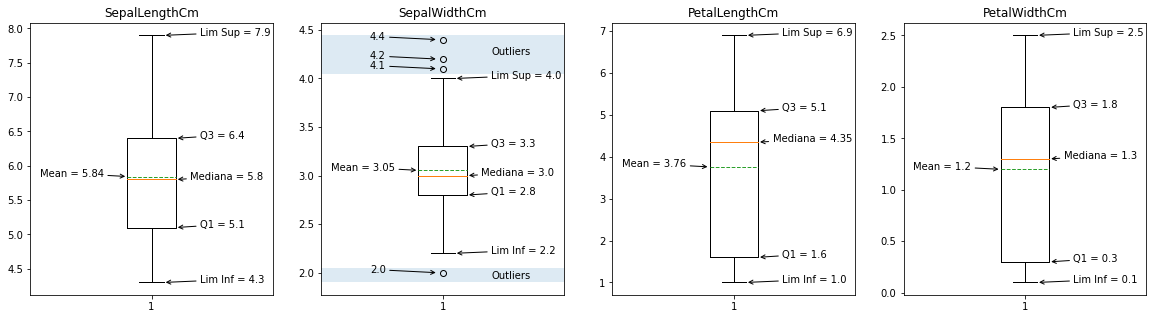

In [21]:
fig, ax = plt.subplots(1, 4, figsize=(20, 5)) #definimos un subplot de fila 1, columna 1 y detallamos su largo ancho
for i, col in enumerate(iris_df.columns[1:-1]):
    plt.subplot(1,4,i+1)
    annotate_stadistics(iris_df, col)

<font color='green'>Fin actividad 1</font>

# <font color='blue'>Manejo de colores</font>

Un punto más a personalizar de nuestros gráficos, corresponden al uso de colores en las marcas/líneas dentro de nuestras visualizaciones. Ya vimos en la clase pasada, el cómo cambiar el color desde la especificación del marcador. Ahora vamos a ver como cambiarlo utilizando el parámetro `color`

En primer lugar, generemos un diagrama de dispersión entre `iris_df['PetalWidthCm']` y `iris_df['PetalLengthCm']`:


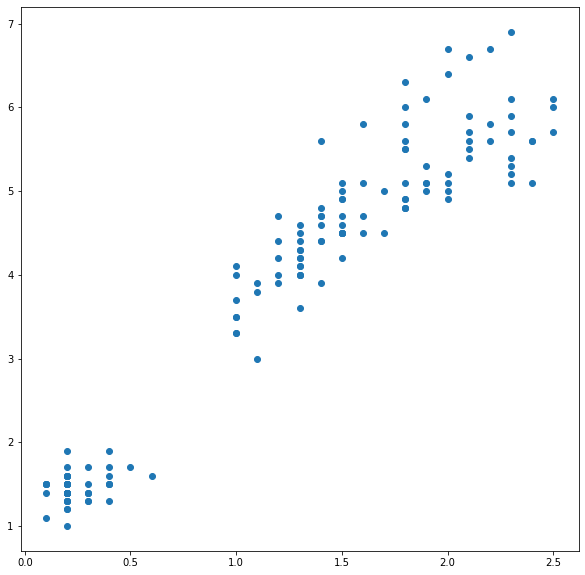

In [22]:
fig, ax = plt.subplots(1,1,figsize=(10,10))

ax.scatter(iris_df['PetalWidthCm'], iris_df['PetalLengthCm']) #scatter es un gráfico de puntos
plt.show()

Acá estamos viendo en general la distribución de los puntos donde existe una alta correlación entre las variables. Ahora le pregunta: ¿Cómo podríamos añadirle por color según cada una de las Especies presente en el set de datos?

In [23]:
iris_df['Species'].unique() # Estas son las 3 especies, ordenadas alfabeticamente

array(['Iris-setosa', 'Iris-versicolor', 'Iris-virginica'], dtype=object)

Para poder añadir el color en nuestros gráficos tal como detallamos anteriormente, hay que utilizar el parámetro color. Si el valor asignado a este parámetro es un único valor, entonces a todos los valores que se están graficando se les asignara dicho color. En el caso que el valor asignado a este parámetro fuese una lista, entonces a cada elemento individual de dicho gráfico se le asignara el color correspondiente en la lista .La restricción de esta forma es utilizar la misma cantidad de colores, como elementos que se están graficando. 

Los valores que se les puede asignar al parámetro de color son los siguientes:

- RGB o RGBA utilizando una tupla de valores entre $[0,1]$, Para RGB son 3 valores (Red, Green, Blue) y para RGBA son 4 valores (Red, Green, Blue, Alpha). ej: (0.2,0.5,0.1) o (0.3,0.5,0.7,0.3)
- String de RGB o RGBA en formato Hexadecimal. Ej: `"#05AAF0"` o `"#05AAF0FF"`
- Un String representando un valor numérico de la escala de grises. Ej: `"0.5"`
- Una letra indicando el posible color. Ej: `"r"` para rojo, `"b"` para azul, `"k"` para negro, etc.
- Un nombre del color de la lista [X11/CSS4](https://en.wikipedia.org/wiki/X11_color_names#Color_name_chart) ej: 'blue', 'red'
- Un nombre del color obtenido de la encuesta realizada por [xkcd](https://c.xkcd.com/random/comic/) para asignarle nombres a unos grupos de colores [Lista de colores](https://xkcd.com/color/rgb/). [Motivación para la encuesta](https://blog.xkcd.com/2010/05/03/color-survey-results/). Para utilizar estos colores, hay que poner como prefijo en el string el texto 'xkcd:'. Ej: 'xkcd:ugly yellow', 'xkcd:almost black', 'xkcd: very pale blue'

[Documentación del uso de colores de Matplotlib](https://matplotlib.org/3.1.0/tutorials/colors/colors.html)


En este caso, nosotros vamos ahora a pintar los puntos dependiendo de la especie. Para esto, vamos a ordenar el dataframe según la columna `Species` alfabéticamente, luego vamos a asignarle un color para cada uno de los puntos asociados a una especie. Como hemos ordenado el dataframe alfabéticamente, los primeros 50 puntos van a corresponder a `Iris Setosa`, los siguiente 50 para `Iris Versicolor` y finalmente los últimos 50 para `Iris Virginica`. 

**Nota:** Podemos asumir el número de muestras para cada una de las especies, debido a que el set de datos de iris es un conjunto balanceado. Para ver otros posibles sets de datos, convendría ver cuáles son el número de muestras para cada variable categórica a pintar. Para esto podríamos ocupar el método `value_counts`, ej: `df['columna'].value_counts()`


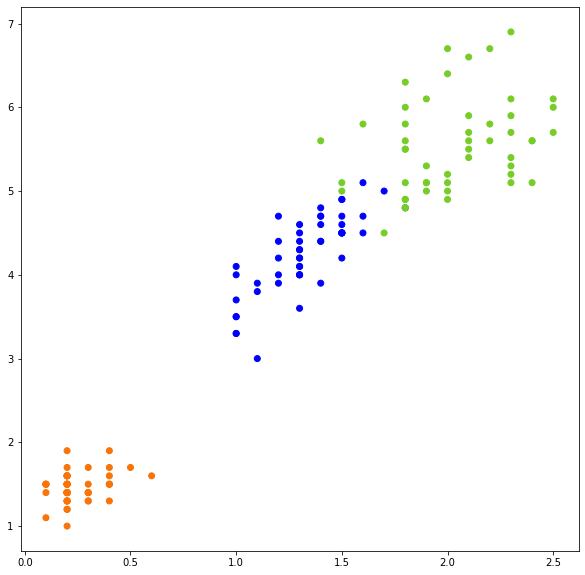

In [24]:
fig, ax = plt.subplots(1, 1, figsize=(10,10))

sorted_df = iris_df.sort_values(['Species']) #Vamos a ordenar segun Species nuestro dataframe

# De esta forma, vamos a asignarle el color a cada punto obtenido en la proyeccion de ambas variables
# Generamos una lista, lo multiplicamos por 50 (Repetimos 50 veces los valores de la lista) y finalmente 
# concatenamos todos los colores con el operador +


color1 = ["#f97306"] * 50 # Naranjo en formato RGB Hexadecimal para Iris-Setosa      #RGB hexadecimal 
color2 = ['Blue'] * 50 # Azul en formato X11/CSS4 para Iris-Versicolor  #X11/CSS4 (colores según formato css)
color3 = ['xkcd:apple green'] * 50 # "Verde manzana" en formato xkcd para Iris-Virginica #formato xkcd

color_final = color1 + color2 + color3 # Generamos los colores para cada punto #150 puntos
ax.scatter(iris_df['PetalWidthCm'], iris_df['PetalLengthCm'],color=color_final) # Ocupamos el parametro color para asignar los colores

plt.show()

Una forma alternativa, seria separar el dataframe para cada una de las especies y luego utilizar el método `plot` (o en este caso scatter) para cada uno de estas nuevas secciones.

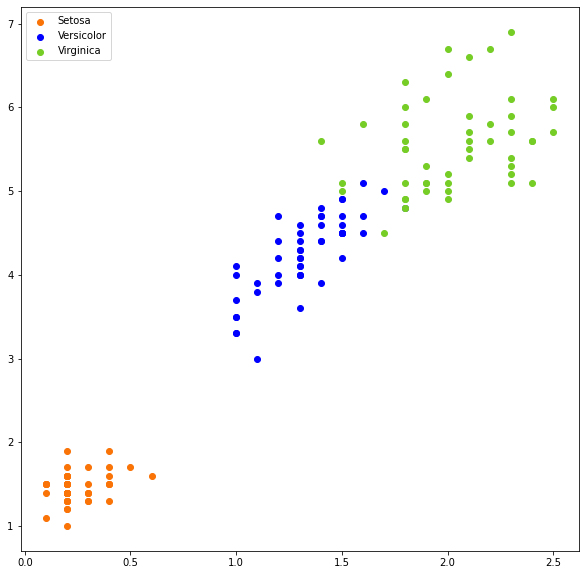

In [25]:
fig, ax = plt.subplots(1, 1, figsize=(10,10))

sorted_df = iris_df.sort_values(['Species'])# Ordenamos el dataframe por Species

setosa_df = sorted_df.iloc[0:50 , :]  #Generamos una seccion del dataframe para iris setosa
versicolor_df = sorted_df.iloc[50:100 , :] # lo mismo para iris versicolor
virginica_df = sorted_df.iloc[100:150:, :] # y finalmente para iris virginica

color1 = "#f97306" # Naranjo en formato RGB Hexadecimal para Iris-Setosa       
color2 = 'Blue' # Azul en formato X11/CSS4 para Iris-Versicolor
color3 = 'xkcd:apple green' # "Verde manzana" en formato xkcd para Iris-Virginica

ax.scatter(setosa_df['PetalWidthCm'], setosa_df['PetalLengthCm'], color = color1, label='Setosa') #Scatter para Setosa, con solo una instancia del color y el label para setosa
ax.scatter(versicolor_df['PetalWidthCm'], versicolor_df['PetalLengthCm'], color = color2, label='Versicolor')  #Scatter para Versicolor
ax.scatter(virginica_df['PetalWidthCm'], virginica_df['PetalLengthCm'], color = color3, label='Virginica') #Scatter para Virginica
#se usan labels
ax.legend() #Añadimos la leyenda, la cual va a respetar los colores utilizados.

plt.show()

## <font color='green'>Actividad 2:</font>

Para esta dinámica vamos a utilizar un set de datos de series temporales multivariada, específicamente el set de datos de climatológicos de la ciudad de Delhi, India. Este set de datos contiene 4 variables numéricas las cuales son:

- meantemp: Temperatura promedio de un día
- humidity: Valor de humedad ambiente diario
- wind_speed: Velocidad del viento en Km/h
- meanpressure: Medición de presión atmosférica

Cada fila de este set de datos corresponde a un día, y el rango de fecha se extiende desde 01-enero-2013 y 01-enero-2017 (4 años). Lo que se va a pedir es lo siguiente:

1.- Obtener las estadísticas descriptivas para cada una de las variables. **¿Podemos observar algo interesante en los datos?**

2.- Obtenga la matriz de correlación y grafíquela

3.- Utilizando subgráficos, grafique para cada variable su histograma (de forma horizontal), seguido por su diagrama de caja y bigote. **¿Que podemos observar con respecto a las variables? ¿Qué creen que puede estar pasando?**

4.- Utilizando subgráficos, grafique 4 diagramas de dispersión para distintos pares de variables presentes en los datos.

5.- Utilizando subgráficos, grafique 4 diagramas de línea para cada posible variable del set de datos, utilice distintos colores para diferenciar las variables **¿Que podemos notar con esta representación?**

6.- Si es que existe algún problema con alguna de las variables, utilice el método `ax[n,m].set_ylim((lim_bajo, lim_alto))` para cambiar los valores del eje Y (Como sugerencia, utilice el rango intercuartil y la mediana de dicha variable para fijar los limites)

**Nota:** Los gráficos deberían tener título y si llegasen a requerir, títulos en los ejes. Con respecto a las anotaciones, no es necesario que en cada gráfico estén presentes. Utilícelos a conciencia. 


**Desafíos**

7.- Reemplace los valores problemáticos de la variable. **¿Con que valor o método podríamos modificar estos datos problemáticos?**

8.- Con los datos corregidos, genere nuevamente los gráficos. **¿Ahora hacen mayor sentido los gráficos?**

9.- Genere un gráfico con múltiples líneas con las temperaturas promedio. El color de cada línea, debe estar relacionado al año de dicha medición. (Como ayuda, tienen que extraer el año de la columna date y luego generar una nueva columna con dichos años).


In [26]:
# Tu código aquí ...
#delhi_df = pd.read_csv("/content/drive/MyDrive/Colab Python/03. Análisis Exploratorio y Estadística/Archivos/VD04.csv") # Hacemos la lectura de los datos
delhi_df = pd.read_csv("/content/drive/MyDrive/Colab_Python/03. Análisis Exploratorio y Estadística/Archivos/VD04.csv")
delhi_df.sample(10) #mostramos 10 datos al azar

,date,meantemp,humidity,wind_speed,meanpressure
243,2013-09-01,30.000000,65.200000,11.480000,1003.200000
317,2013-11-14,17.625000,63.375000,3.475000,1015.250000
808,2015-03-20,22.500000,65.750000,9.025000,1014.875000
518,2014-06-03,34.875000,33.625000,6.487500,1000.000000
73,2013-03-15,24.166667,45.833333,7.716667,1016.166667
961,2015-08-20,30.750000,58.625000,14.600000,1001.375000
960,2015-08-19,31.250000,61.250000,33.325000,1002.375000
731,2015-01-02,14.875000,96.625000,3.012500,1017.875000
309,2013-11-06,20.571429,66.714286,3.185714,1015.857143
452,2014-03-29,25.875000,55.625000,8.350000,1011.250000


In [27]:
#1
delhi_df.describe() #resumen descriptivo

,meantemp,humidity,wind_speed,meanpressure
count,1462.000000,1462.000000,1462.000000,1462.000000
mean,25.495521,60.771702,6.802209,1011.104548
std,7.348103,16.769652,4.561602,180.231668
min,6.000000,13.428571,0.000000,-3.041667
25%,18.857143,50.375000,3.475000,1001.580357
50%,27.714286,62.625000,6.221667,1008.563492
75%,31.305804,72.218750,9.238235,1014.944901
max,38.714286,100.000000,42.220000,7679.333333


<font color="green">La variable meantemp es levemente asimétrica hacia la ziquierda, ya que el rango de valores donde están concentrado el 50% mayor (max-50%)es mayor al 50% menor (50%-min). </font>

<font color="green">Al igual que meantemp, humidity tiene un comportamiento similar, aunque por la diferencia entre el mínimo y el 25% indican una posible existencia de datos outliers.</font>

<font color="green">la variable wind_speed entre el mínimo y el 75% se observa bien simétrica, aunque el valor máximo escapa del rango, evidenciando uno o más valores outliers</font>

<font color="green">Por último, el 50% meanpressure está concentrado entre 1001.58 y 1014.94, un rango bastante pequeño, al parecer la concentración de los datos están en un pequeño rango de valores, con una mayor cantidad de valores outliers.</font>

In [28]:
delhi_df.corr()

,meantemp,humidity,wind_speed,meanpressure
meantemp,1.000000,-0.571951,0.306468,-0.038818
humidity,-0.571951,1.000000,-0.373972,0.001734
wind_speed,0.306468,-0.373972,1.000000,-0.020670
meanpressure,-0.038818,0.001734,-0.020670,1.000000


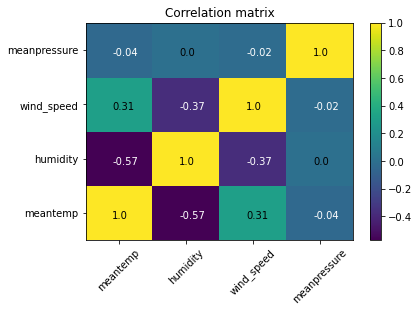

In [29]:
#2
corr = delhi_df.corr().values
heatmap = plt.pcolormesh(corr)
cbar = plt.colorbar(heatmap)

def color_text(x):
    if x>=0:
        return 'black'
    else:
        return 'white'

columns = delhi_df.columns.to_list()[1:]
plt.xticks([0.5, 1.5, 2.5, 3.5], columns, rotation=45)
plt.yticks([0.5, 1.5, 2.5, 3.5], columns)
for i in range(4):
    for j in range(4):
        text = plt.text(j + 0.4, i + 0.4, corr[i, j].round(2), color=color_text(corr[i, j]))
plt.title("Correlation matrix")
plt.show()

<font color="green">La combinación entre la temperatura media y humedad es aquella que tiene una mayor correlación (-0.57), en sentido inverso (valor negativo).</font>

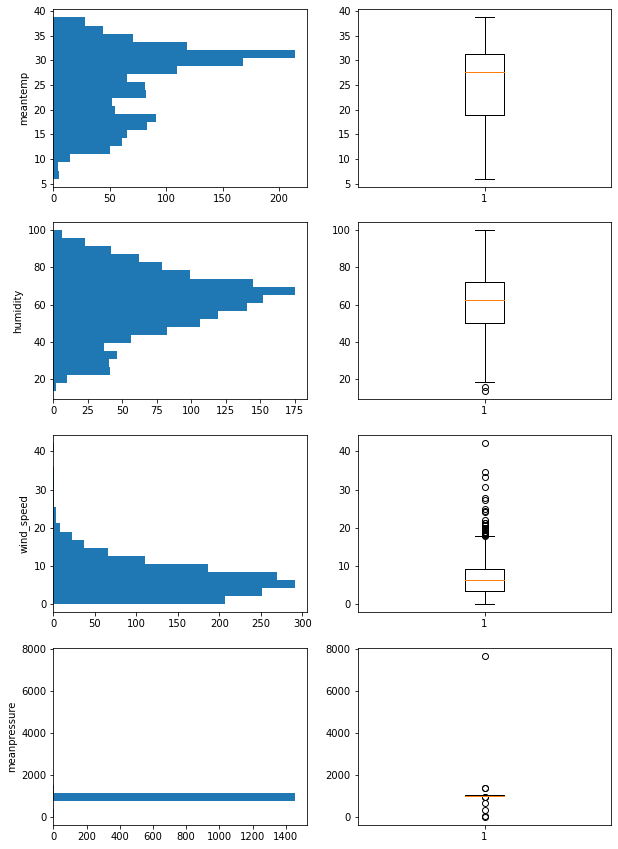

In [30]:
#3
fig,ax = plt.subplots(4,2,figsize=(10,15))

for i in range(4):
    ax[i,0].hist(delhi_df[delhi_df.columns[1:][i]], orientation='horizontal', bins=20)
    ax[i,0].set_ylabel(f'{delhi_df.columns[1:][i]}')
    ax[i,1].boxplot(delhi_df[delhi_df.columns[1:][i]])

plt.show()

<font color="green">Meantemp observa asimetría (línea roja no está en el centro del cajón), y no se observan observaciones outliers.</font>

<font color="green">Los registros de humidity son más simétricos y hay algunos valores ouliers en la parte inferior. </font>

<font color="green">Wind_speed es una variable asimétrica a la derecha con una mayor cantidad de observaciones outliers en su límite superior.</font>

<font color="green">por último, los valores de meanpressure están concentrados en un pequeño rango de valores, y dejando observaciones outliers en ambos límites</font>

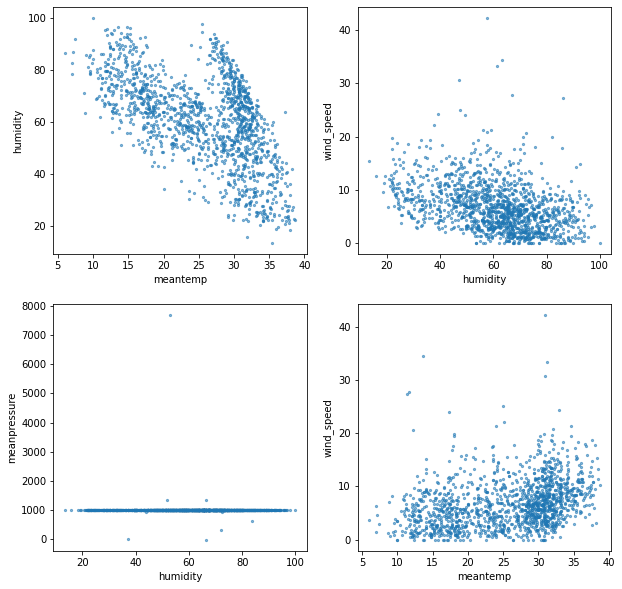

In [31]:
#4
fig, ax = plt.subplots(2,2,figsize=(10,10))

x = ['meantemp', 'humidity', 'humidity', 'meantemp']
y = ['humidity', 'wind_speed', 'meanpressure', 'wind_speed']

for i in range(2):
    for j in range(2):
        ax[i,j].scatter(delhi_df[x[i*2+j]], delhi_df[y[i*2+j]], alpha=0.55, s=20, marker='.')
        ax[i,j].set_xlabel(x[i*2+j])
        ax[i,j].set_ylabel(y[i*2+j])
plt.show()

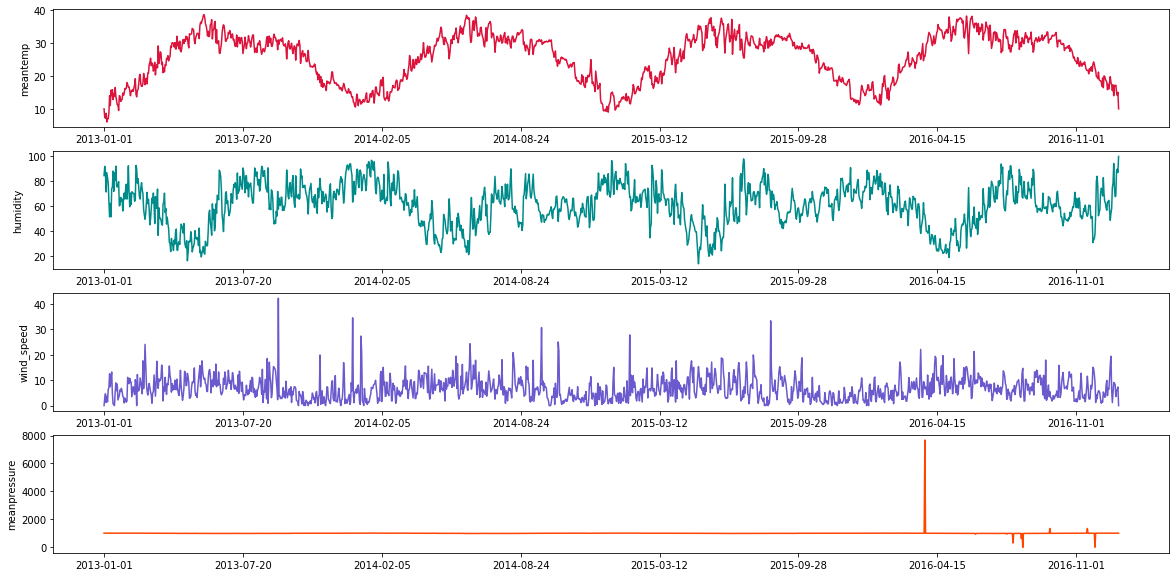

In [32]:
#5
fig, ax = plt.subplots(4,1,figsize=(20,10))
ticks_label = [0] + [delhi_df['date'][i] for i in range(0,1401,200)] # los xticks por defecto comenzaban de 0 hasta 1400 a paso de 200
col_line = ['crimson', 'darkcyan', 'slateblue', 'orangered']

for i, col in enumerate(delhi_df.columns[1:]):
    ax[i].plot(delhi_df[col], color=col_line[i])
    ax[i].set_ylabel(col)
    ax[i].set_xticklabels(ticks_label)
plt.show()

<font color="green">Para meantemp, se observa un comportamiento estacional anual de los datos, es decir, se observa un comportamiento similar en cada año de observación.</font>

<font color="green">Al igual que meantemp, humidity tiene un comportamiento estacional anual.</font>

<font color="green">En caso de wind_speed, se observa una componente que se mueve en un rango acotado (0, 20)constante, con un movimiento estacional anual (un leve aumento en el viento en los meses de invierno) y algunos valores muy altos que deben ser analizados según cada caso.</font>

<font color="green">Para meanpressure, se observa en una gráfica constante con algunos valores extremos.</font>

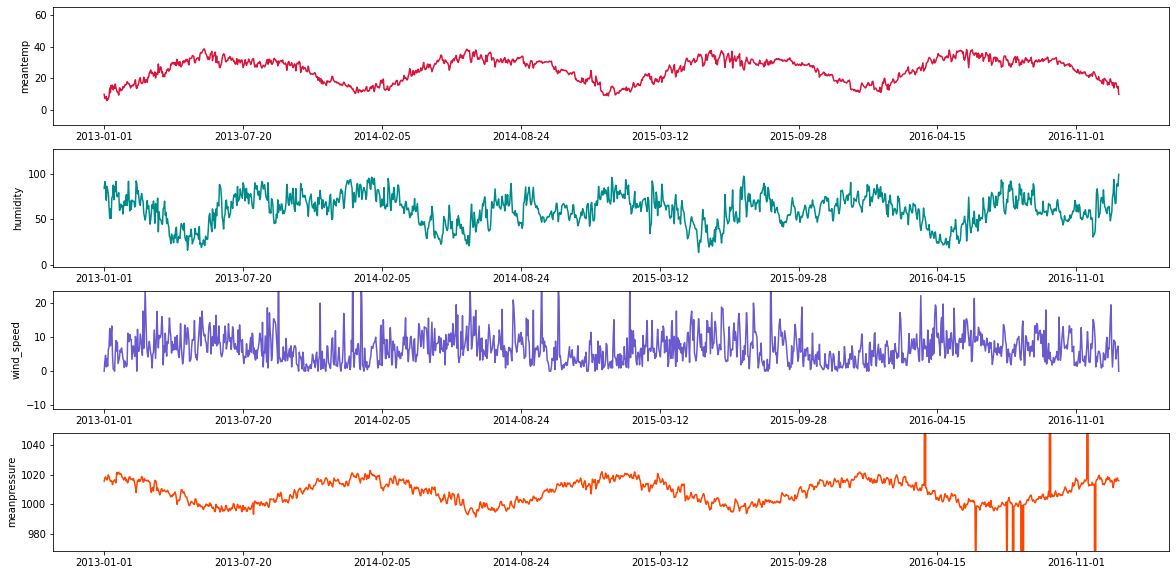

In [33]:
#6
fig, ax = plt.subplots(4,1,figsize=(20,10))
ticks_label = [0] + [delhi_df['date'][i] for i in range(0,1401,200)] # los xticks por defecto comenzaban de 0 hasta 1400 a paso de 200
col_line = ['crimson', 'darkcyan', 'slateblue', 'orangered']

for i, col in enumerate(delhi_df.columns[1:]): #Ojo aquí
    q1 = delhi_df[col].quantile(0.25)
    q2 = delhi_df[col].quantile(0.5)
    q3 = delhi_df[col].quantile(0.75)
    ax[i].plot(delhi_df[col], color=col_line[i])
    ax[i].set_ylabel(col)
    ax[i].set_xticklabels(ticks_label)
    ax[i].set_ylim(q2 - 3 * (q3- q1), q2 + 3 * (q3- q1))
plt.show()

<font color="green">Se dejó la banda en torno a la mediana y es de 6 veces el rango intercuantil. Desde aquí se esconde la magnitud de los outliers, e inlcuso, en meanpressure se logra observar su tendencia estacional.</font>

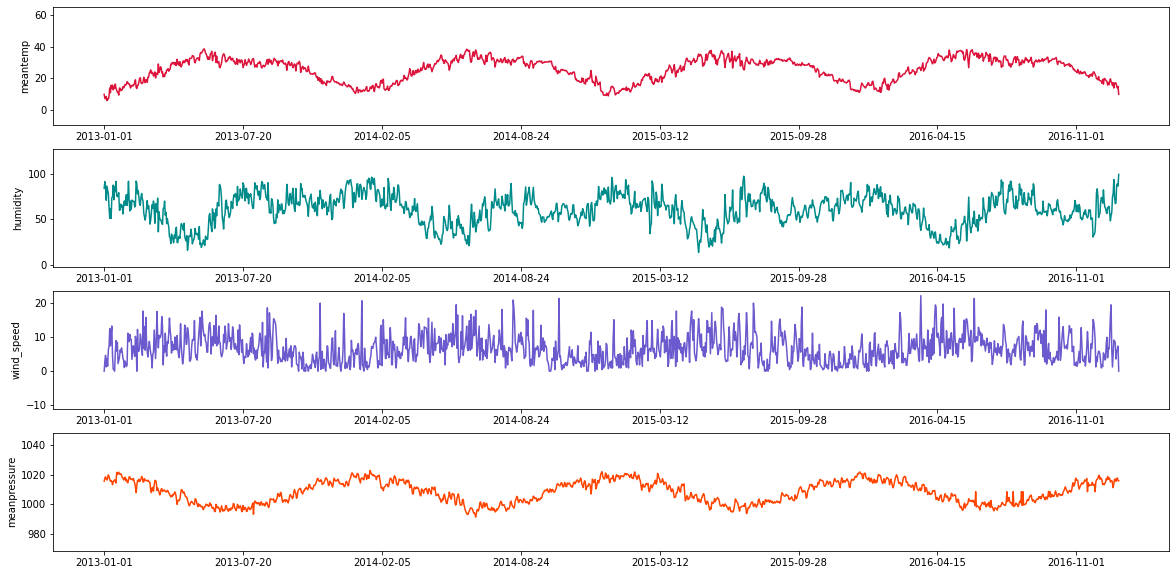

In [34]:
#7 y 8 reemplazamos todos los valores que se encuentren fuera de la banda de 6 veces el rango intercuantil por la mediana 
#de los valores que si están contenidos en la banda de 6 RIC, con centro en la mediana

fig, ax = plt.subplots(4,1,figsize=(20,10))
ticks_label = [0] + [delhi_df['date'][i] for i in range(0,1401,200)] # los xticks por defecto comenzaban de 0 hasta 1400 a paso de 200
col_line = ['crimson', 'darkcyan', 'slateblue', 'orangered']

for i, col in enumerate(delhi_df.columns[1:]): #Ojo aquí
    q1 = delhi_df[col].quantile(0.25)
    q2 = delhi_df[col].quantile(0.5)
    q3 = delhi_df[col].quantile(0.75)

    #reemplaza los valores que están fuera del rango de 3 RIC por la mediana
    q1 = delhi_df[col].quantile(0.25)
    q2 = delhi_df[col].quantile(0.5)
    q3 = delhi_df[col].quantile(0.75)  

    med = delhi_df[(delhi_df[col]>=q2 - 3 * (q3- q1)) & (delhi_df[col]<=q2 + 3 * (q3- q1))][col].median() #calcula mediana para los
    #valores que están en la banda de 6 RIC
    delhi_df[col] = np.where((delhi_df[col]<q2 - 3 * (q3- q1)) | (delhi_df[col]>q2 + 3 * (q3- q1)), med, delhi_df[col]) #Reemplaza los
    #valores que están fuera del rango de 6 RIC por med (la mediana de los valores que están en la banda de 6 RIC)

    #Gráficos
    ax[i].plot(delhi_df[col], color=col_line[i])
    ax[i].set_ylabel(col)
    ax[i].set_xticklabels(ticks_label)
    ax[i].set_ylim(q2 - 3 * (q3- q1), q2 + 3 * (q3- q1))
plt.show()

<font color="green">Al modificar los valores outliers por la mediana de los valores que están en el rango de 6 RIC, todos los puntos están contenidos en el gráfico</font>

In [35]:
#9
delhi_df['year'] = pd.DatetimeIndex(delhi_df['date']).year
#Mes y día 
delhi_df['Month_Day'] = pd.DatetimeIndex(delhi_df['date']).strftime('%m-%d')
# Remover fechas con febrero 29
delhi_df = delhi_df[delhi_df['Month_Day']!='02-29'] #Se eliminan años bisiestos para que tener la misma dimensión de datos por año
#mostrar algunos valores
delhi_df.sample(8)

,date,meantemp,humidity,wind_speed,meanpressure,year,Month_Day
9,2013-01-10,11.000000,62.000000,7.400000,1015.666667,2013,01-10
87,2013-03-29,21.250000,70.375000,5.550000,1009.750000,2013,03-29
35,2013-02-05,16.625000,92.375000,9.725000,1016.375000,2013,02-05
1284,2016-07-08,30.800000,75.866667,5.433333,997.400000,2016,07-08
183,2013-07-03,31.571429,70.000000,6.357143,997.571429,2013,07-03
14,2013-01-15,14.714286,71.857143,0.528571,1015.857143,2013,01-15
211,2013-07-31,28.833333,78.500000,9.866667,996.666667,2013,07-31
85,2013-03-27,21.000000,62.000000,1.850000,1009.000000,2013,03-27


In [36]:
import matplotlib.dates as dates
import matplotlib.ticker as ticker

In [37]:
print("*** Observaciones por año ***")
print(pd.pivot_table(data=delhi_df, index="year", values="meantemp", aggfunc="count"))

#Se crea un array para los días para el año 2016 (se excluye feb-29)
date_index = np.append(np.arange('2016-01-01','2016-02-29', dtype='datetime64[D]'),
                            np.arange('2016-03-01','2017-01-01', dtype='datetime64[D]'))

*** Observaciones por año ***
      meantemp
year          
2013       365
2014       365
2015       365
2016       365
2017         1


In [38]:
years_analized = delhi_df.year.unique().tolist()
years_analized =sorted(years_analized[:-1])
years_analized

[2013, 2014, 2015, 2016]

<font color="green">La estrategia es tomar las fechas del año 2016 (los tomaremos como eje x), y sólo mostrar los meses del año en el eje x(independiente del año, aunque para nuestros analisis es el año 2016. Además los años comprendidos son entre 2013 y 2016</font>

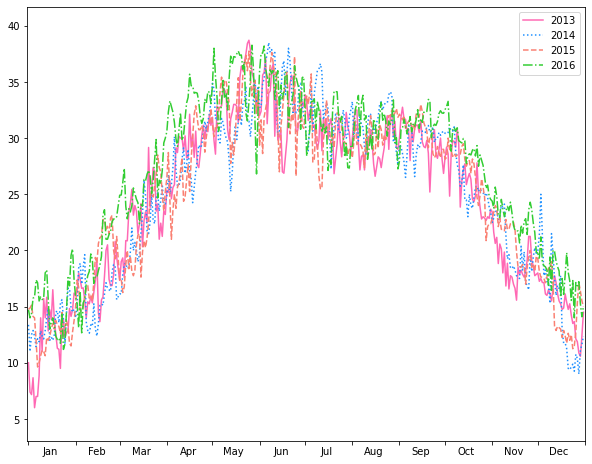

In [39]:
fig, ax = plt.subplots(1,1,figsize=(10,8))
col_line = ['hotpink', 'dodgerblue', 'salmon', 'limegreen']
line_style=['solid','dotted','dashed','dashdot']
for i, col in enumerate(years_analized):
    plt.plot(date_index, delhi_df[delhi_df["year"]==col]['meantemp'], 
             label=col ,color=col_line[i], linestyle=line_style[i])

#eje x (mostrar meses)
ax = plt.gca()
ax.axis([date_index.min()-1, date_index.max()+1, delhi_df['meantemp'].min()-3, delhi_df['meantemp'].max()+3])

# Format the xticks to show the month centered
# Original code can be found here:
# http://matplotlib.org/examples/pylab_examples/centered_ticklabels.html
ax.xaxis.set_major_locator(dates.MonthLocator())
ax.xaxis.set_minor_locator(dates.MonthLocator(bymonthday=15))
ax.xaxis.set_major_formatter(ticker.NullFormatter())
ax.xaxis.set_minor_formatter(dates.DateFormatter('%b'))

for tick in ax.xaxis.get_minor_ticks():
    tick.tick1line.set_markersize(0)
    tick.tick2line.set_markersize(0)
    tick.label1.set_horizontalalignment('center')
ax.legend()
plt.show()

<font color="orangered">las curvas de temperatura tienen una tendencia similar en cada año</font>

<font color='green'>Fin actividad 2</font>